In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

#设置绘图大小
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False



In [2]:
fangzi=pd.read_csv('housing_data.csv',sep='\s+')
X=fangzi.drop(["medv"],axis=1)
y=fangzi["medv"]
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [3]:
#导入随机森林模块
from sklearn.ensemble import RandomForestRegressor
#导入网络搜索交叉验证，网络搜索可以让模型参数按照我们给定的列表遍历，找到效果最好的模型
#交叉验证可以告诉我们模型的准确性
from sklearn.model_selection import GridSearchCV
#构造参数字典，让这三个参数按照列表给定的顺序排列组合遍历一遍
param_grid={
    'n_estimators':[5,10,20,50,100,200],#决策树的个数
    'max_depth':[3,5,7],#最大树深，树太深会造成过拟合
    'max_features':[0.6,0.7,0.8,1]#决策树划分时考虑的最大特征数
}
#实例化随机森林回归器
rf=RandomForestRegressor()
#一随机森林回归器为基础构造网络搜索回归器
grid=GridSearchCV(rf,param_grid=param_grid,cv=3)

grid.fit(x_train,y_train)

E:\PYTHON3.7\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7],
       

In [4]:
#查看效果最好的模型
grid.best_params_

{'max_depth': 7, 'max_features': 0.6, 'n_estimators': 50}

In [5]:
#制定效果最好参数对应的模型
rf_reg=grid.best_estimator_
rf_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features=0.6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [6]:
#可视化其中一颗决策树

In [7]:
from sklearn import tree
import pydotplus
from IPython.display import Image,display

In [15]:
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'E:/Program Files (x86)/Graphviz2.38/bin/'


True

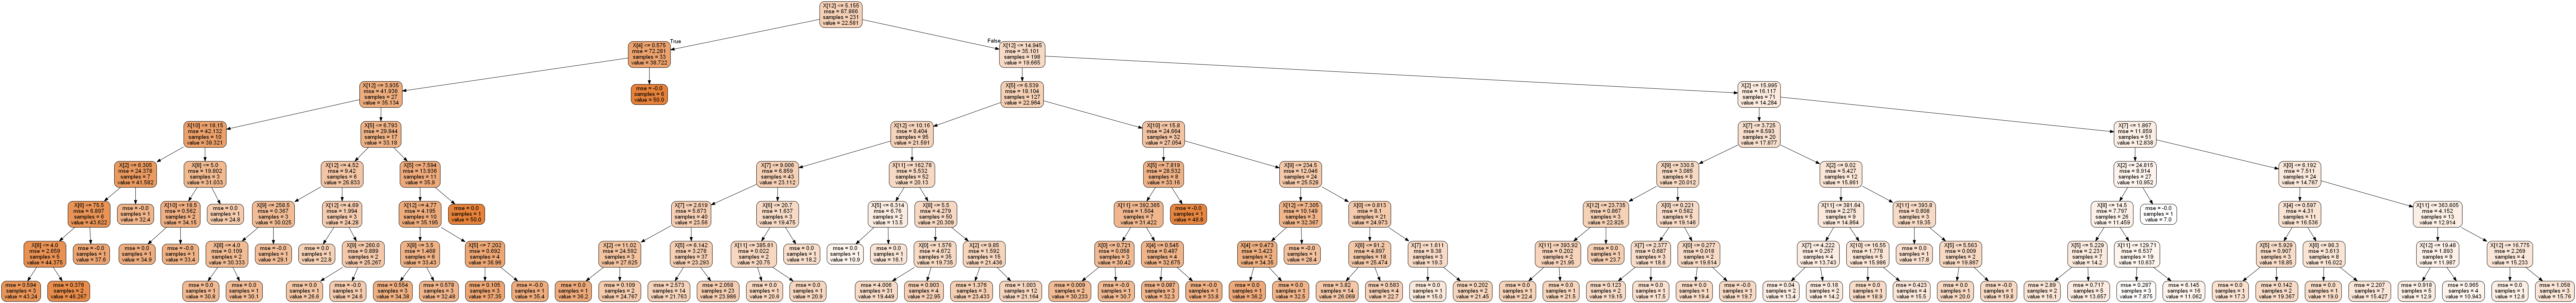

In [19]:
estimator=rf_reg.estimators_[3]
dot_data=tree.export_graphviz(estimator,
                              out_file=None,
                              filled=True,
                              rounded=True
                             )
graph=pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

In [20]:
#特征重要度分析
rf_reg.feature_importances_

array([0.05191485, 0.00718933, 0.01434807, 0.00128931, 0.03502693,
       0.38211472, 0.01566321, 0.04192282, 0.00382356, 0.01686914,
       0.06469487, 0.01199522, 0.35314795])

In [21]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [24]:
print('特征排序：')
feature_names=X.columns
feature_importances=rf_reg.feature_importances_
indices=np.argsort(feature_importances)

for index in indices:
    print('feature %s (%f)' %(feature_names[index],feature_importances[index]))

特征排序：
feature chas (0.001289)
feature rad (0.003824)
feature zn (0.007189)
feature b (0.011995)
feature indus (0.014348)
feature age (0.015663)
feature tax (0.016869)
feature nox (0.035027)
feature dis (0.041923)
feature crim (0.051915)
feature ptratio (0.064695)
feature lstat (0.353148)
feature rm (0.382115)


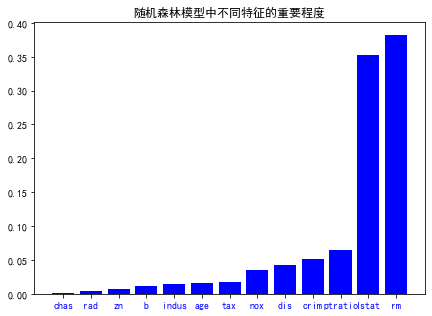

In [30]:
plt.figure(figsize=(7,5))
plt.title('随机森林模型中不同特征的重要程度')
plt.bar(range(len(feature_importances)),feature_importances[indices],color='b')
plt.xticks(range(len(feature_importances)),np.array(feature_names)[indices],color='b')
plt.show()

In [33]:
#可视化测试集上回归预测的结果
result={"labels":y_test,"prediction":rf_reg.predict(x_test)}
result=pd.DataFrame(result)

In [34]:
result.head()

,labels,prediction
329,22.6,23.803455
371,50.0,29.283597
219,23.0,21.860347
403,8.3,11.053672
78,21.2,20.603758


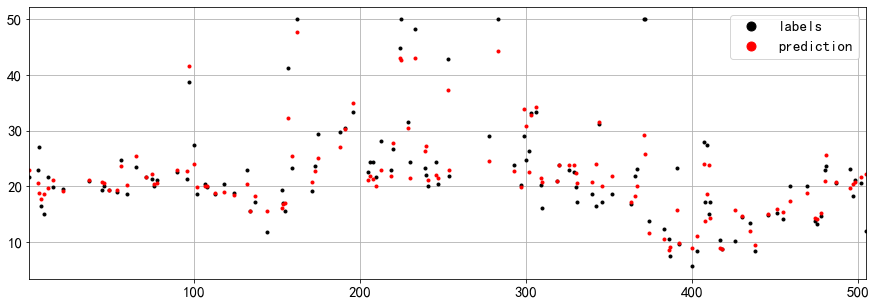

In [37]:
result['labels'].plot(style='k.',figsize=(15,5))
result['prediction'].plot(style='r.')
plt.legend(fontsize=15,markerscale=3)#设置图例字号以及图例大小
plt.tick_params(labelsize=15)#设置坐标数字大小
plt.grid()

In [43]:
#计算均方误差和均方根误差
from sklearn import metrics
MSE=metrics.mean_squared_error(y,rf_reg.predict(X))
RMSE=np.sqrt(MSE)
print('(MSE,RMSE)=',(MSE,RMSE))

(MSE,RMSE)= (6.2926059266861065, 2.5085067125056906)


In [44]:
submission={"prediction":rf_reg.predict(x_test)}
submission=pd.DataFrame(submission)
submission.to_csv('随机森林预测波士顿房价数据提交.csv')